In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# init
plot_range = (0,np.pi+step)
step = 0.00001
xLeft = 1
xRight = 2
precision = 0.000001 # fuer a priori

In [97]:
# functions
def function(x):
    return 2+1/(np.cos(x+np.pi/4)-1)
def derivative(x):
    return np.sin(x+np.pi/4)/(np.cos(x+np.pi/4)-1)**2
def lipschitz(dF_values):
    return np.max(np.abs(dF_values))

def fixpoint_iteration(lipschitz,x0,precision=1e-6,iterations=1000):
    k=0
    notConverged=True
    while (notConverged and k<iterations):
        x1=function(x0)
        incr=np.abs(x1-x0)
        error=lipschitz/(1-lipschitz)*incr
        notConverged=error>precision
        k=k+1
        x0=x1
    n=k
    return x1

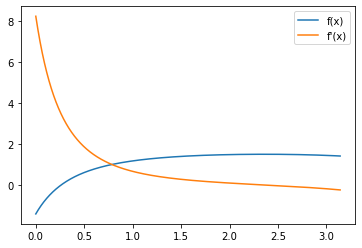

In [77]:
# plot
x_values = np.arange(plot_range[0],plot_range[1],step)
y1_values = [function(x) for x in x_values]
y2_values = [derivative(x) for x in x_values]

plt.plot(x_values, y1_values, label='f(x)')
plt.plot(x_values, y2_values, label='f\'(x)')
plt.legend()

In [78]:
x_values = np.arange(xLeft,xRight,step)
y1_values = [function(x) for x in x_values]
y2_values = [derivative(x) for x in x_values]

# condition 1: smallest f(x) >= left border
cond_1 = np.min(y1_values) >= xLeft
# condition 2: largest f(x) <= right border
cond_2 = np.max(y1_values) <= xRight

if cond_1 and cond_2 and lipschitz(y2_values) <= 1:
    print('lipschitz alpha = {}'.format(lipschitz(y2_values)))
else:
    print('Fixpunktsatz von Banach nicht erfüllt')
    print(cond_1)
    print(cond_2)
    print(lipschitz(y2_values)<=1)

lipschitz alpha = 0.6640946355544965


In [98]:
# a priori
x0 = xLeft
x1 = function(x0)
result = np.log(precision/np.abs(x1 - x0)*(1-lipschitz(y2_values)))/np.log(lipschitz(y2_values))
print('a priori abschaetzung: {} iterationen maximal fuer genauigkeit {}'.format(int(result+1), precision))

# a posteriori
#
# x1 is x_(i+1) and x_0 is x_i
# alternatively use x1 = fixpoint_iteration(lipschitz(y2_values),n,precision,iteration_amount)
# and               x0 = fixpoint_iteration(lipschitz(y2_values),n-1,precision,iteration_amount)
#
x1 = [1.3441]
x0 = [1.3376]
result = lipschitz(y2_values)/(1-lipschitz(y2_values))*np.abs(x1[0]-x0[0])
print('a posteriori genauigkeit: {}'.format(result))

fixpoint_iteration(lipschitz(y2_values), 1, 0.00001,100)

a priori abschaetzung: 33 iterationen maximal fuer genauigkeit 1e-06
a posteriori genauigkeit: 0.012850688283082362


1.3477641496457973